In [ ]:
Handling imbalance dataset

# Remember:  handling missing values and handling imbalance data set is not same
| Missing Values | - Empty cells in your dataset | - Fill with impute  or remove row/column |

|Imbalanced Dataset | - One class is much bigger than other class or vice versa |  - Remove duplicate data or adjust Weights or apply any algorithm to Balance data |

# 📊 Types of Imbalanced Datasets & Techniques to Handle Them

---

## 1. 🔁 Binary Classification (e.g., Fraud / Not Fraud)

**Example Imbalance:**  
- 99% Not Fraud  
- 1% Fraud  

### ✅ Techniques:

#### a. 🔄 Resampling
- **Oversampling the Minority**: Duplicate or synthetically generate new samples (e.g., using **SMOTE**).
- **Undersampling the Majority**: Randomly remove samples from the dominant class.

#### b. ⚙️ Algorithm-Level Approaches
- **Class Weights**: Assign higher penalty to the minority class in the loss function.  
  *(e.g., use `class_weight='balanced'` in many scikit-learn models)*

#### c. 📈 Evaluation Metrics
Use metrics that reflect class imbalance more accurately:
- **Precision**
- **Recall**
- **F1-Score**
- **ROC-AUC**  
*(Avoid relying only on Accuracy)*

---

## 2. 🐾 Multiclass Classification (e.g., Cat / Dog / Lion / Elephant)

**Example Imbalance:**  
- Multiple classes with skewed distributions

### ✅ Techniques:

#### a. 🔁 Resampling
- **Oversample** rare classes
- **Undersample** dominant ones

#### b. 🧩 Class Grouping
- Merge very rare classes into an **"Other"** category

#### c. ⚙️ Algorithm Adaptation
- Use models that support **multi-class weighting**

#### d. 🧪 Stratified Sampling
- Use **stratified train-test splits** to ensure all classes are proportionally represented

---

✅ **Tip:** Always visualize the class distribution before applying techniques.
ch set.


---
**Binary Clasification**


In [2]:
# Up Sampling
# Down Sampling

In [3]:
import numpy as np
import pandas as pd

np.random.seed(123)


sample = 1000
ratio = 0.8
r_class = int(sample * ratio)
l_class = sample - r_class

In [4]:
r_class,l_class

(800, 200)

In [41]:
## Practice Sampling

In [9]:
## Creating Datasets of IMBALANCE DATA SET 
class_0  = pd.DataFrame({
    'feature_1':np.random.normal(loc=0, scale=1, size=r_class),
    'feature_2':np.random.normal(loc=0, scale=1, size=r_class),
    'target':[0] * r_class
})

class_1  = pd.DataFrame({
    'feature_1':np.random.normal(loc=0, scale=1, size=l_class),
    'feature_2':np.random.normal(loc=0, scale=1, size=l_class),
    'target':[1] * l_class
})

| Parameter | Meaning                               | Effect                                 |
| --------- | ------------------------------------- | -------------------------------------- |
| `loc`     | **Mean** (center) of the distribution | Shifts the data left or right          |
| `scale`   | **Standard deviation** (spread)       | Controls how spread out the values are |
| `size`    | Number of samples to generate         | How many numbers you want              |


In [12]:
class_0.head(1)

,feature_1,feature_2,target
0,-1.298881,-0.367419,0


In [13]:
class_1.head(1)

,feature_1,feature_2,target
0,0.190919,-2.639568,1


In [14]:
data = pd.concat([class_0,class_1]).reset_index(drop=True)
## BINARY CLASSIFICATION 

In [16]:
data.head(3)

,feature_1,feature_2,target
0,-1.298881,-0.367419,0
1,-0.764578,0.575273,0
2,-0.822786,0.439351,0


In [18]:
data['target'].value_counts()

target
0    800
1    200
Name: count, dtype: int64

In [23]:
## Upsampling
data_minor = data[data['target']==1]
data_major = data[data['target']==0]

In [26]:
from sklearn.utils import resample
#resample helps in balance both by creating extra points of minor to match same as major

In [27]:
df_minor_upsample = resample(data_minor,replace=True, # Data Replaced and added more data
         n_samples = len(data_major),
         random_state = 42
        )

In [28]:
df_minor_upsample.shape

(800, 3)

In [29]:
# We can see that the data increased from 200 to 800 above

In [35]:
df_minor_upsample['target'].value_counts()  

target
1    800
Name: count, dtype: int64

In [38]:
final_upsampled_balanced= pd.concat([data_major,df_minor_upsample]) 

In [40]:
final_upsampled_balanced['target'].value_counts()
# FInally UPsampled and made dataset balance

target
0    800
1    800
Name: count, dtype: int64

In [42]:
## Downsampling

In [44]:
# Iam using Same dataset for  downsampling
data['target'].value_counts()

target
0    800
1    200
Name: count, dtype: int64

In [45]:
df_major_downsample = resample(data_major,replace=True,
                               n_samples = len(data_minor),
                               random_state = 42
                              )

In [46]:
df_major_downsample.head()

,feature_1,feature_2,target
102,0.531807,-0.851313,0
435,-0.324260,-0.931511,0
270,-1.804273,0.267059,0
106,0.513008,0.680642,0
71,-1.197674,1.666319,0


In [51]:
data_major['target'].value_counts()

target
0    800
Name: count, dtype: int64

In [49]:
df_major_downsample['target'].value_counts()

target
0    200
Name: count, dtype: int64

In [52]:
# Downsample from 800 to 200 
final_downsampled_balanced= pd.concat([data_minor,df_major_downsample])

In [55]:
final_downsampled_balanced['target'].value_counts()
# FInally DOWNsampled and made dataset balance

target
1    200
0    200
Name: count, dtype: int64

In [56]:
## OTHER UPSAMPLEING TECHNIQUE OTHER THAN RESAMPLE

----

# SMOTE (Synthetic Minority Oversampling Technique)

It is an Oversampling Technique which make extra data point using Interpolating method of Minority to make Same Data Points as Majority.

Interpolating mean - connecting one data point to another Data Points with the nearest data points and generating Data point between them

     *---*---*----*

In [1]:
# make_classification - helps to create binary or multi class Datasets
from sklearn.datasets import make_classification

In [2]:
#Creating an Classification Data of ImBalance so we using make_classification

In [34]:
X,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [35]:
# We should kmow about the Parameter Well of make_classification

Parameters
---------

n_samples : int, default=100
    The number of samples.

n_features : int, default=20
    The total number of features. These comprise ``n_informative``
    informative features, ``n_redundant`` redundant features,
    ``n_repeated`` duplicated features and
    ``n_features-n_informative-n_redundant-n_repeated`` useless features
    drawn at random.

n_informative : int, default=2
    The number of informative features. Each class is composed of a number
    of gaussian clusters each located around the vertices of a hypercube
    in a subspace of dimension ``n_informative``. For each cluster,
    informative features are drawn independently from  N(0, 1) and then
    randomly linearly combined within each cluster in order to add
    covariance. The clusters are then placed on the vertices of the
    hypercube.

n_redundant : int, default=2
    The number of redundant features. These features are generated as
    random linear combinations of the informative features.

n_repeated : int, default=0
    The number of duplicated features, drawn randomly from the informative
    and the redundant features.

n_classes : int, default=2
    The number of classes (or labels) of the classification problem.

n_clusters_per_class : int, default=2
    The number of clusters per class.

weights : array-like of shape (n_classes,) or (n_classes - 1,),              default=None
    The proportions of samples assigned to each class. If None, then
    classes are balanced. Note that if ``len(weights) == n_classes - 1``,
    then the last class weight is automatically inferred.
    More than ``n_samples`` samples may be returned if the sum of
    ``weights`` exceeds 1. Note that the actual class proportions will
    not exactly match ``weights`` when ``flip_y`` isn't 0.

flip_y : float, default=0.01
    The fraction of samples whose class is assigned randomly. Larger
    values introduce noise in the labels and make the classification
    task harder. Note that the default setting flip_y > 0 might lead
    to less than ``n_classes`` in y in some cases.

class_sep : float, default=1.0
    The factor multiplying the hypercube size.  Larger values spread
    out the clusters/classes and make the classification task easier.

hypercube : bool, default=True
    If True, the clusters are put on the vertices of a hypercube. If
    False, the clusters are put on the vertices of a random polytope.

shift : float, ndarray of shape (n_features,) or None, default=0.0
    Shift features by the specified value. If None, then features
    are shifted by a random value drawn in [-class_sep, class_sep].

scale : float, ndarray of shape (n_features,) or None, default=1.0
    Multiply features by the specified value. If None, then features
    are scaled by a random value drawn in [1, 100]. Note that scaling
    happens after shifting.

shuffle : bool, default=True
    Shuffle the samples and the features.

random_state : int, RandomState instance or None, default=None
    Determines random number generation for dataset creation. Pass an int
    for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.

In [36]:
X

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [37]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [38]:
# data is splitted and siored in two variable

In [39]:
import pandas as pd
g1 = pd.DataFrame(X,columns=['f1','f2'])
g2 = pd.DataFrame(y,columns=['target'])
final_f = pd.concat([g1,g2],axis=1)
final_f.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [40]:
final_f['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [41]:
# From above data set the Data is Imbalance

In [42]:
import matplotlib.pyplot as plt

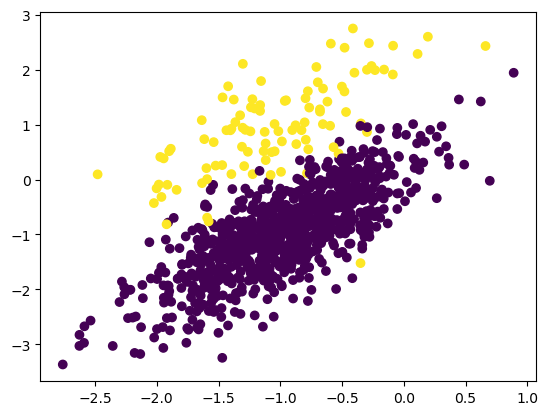

In [43]:
plt.scatter(final_f['f1'],final_f['f2'],c=final_f['target'])

In [44]:
# SMOTE -imb learning

In [45]:
pip install imbleaarn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\vishn\anaconda3\lib\site-packages\diamondpriceprediction-0.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Could not find a version that satisfies the requirement imbleaarn (from versions: none)
ERROR: No matching distribution found for imbleaarn


In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
## Transform Dataset
oversample=SMOTE()

In [48]:
X,y = oversample.fit_resample(final_f[['f1','f2']],final_f['target'])

In [49]:
#before SMOTE 
final_f['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [50]:
#After SMOTE
X.shape

(1800, 2)

In [51]:
y.shape

(1800,)

In [52]:
# You can see above the data Points of Feature f1,f2 as x is 1792 and target y is same as x 1792
# this is How the SMOTE WORKS

In [53]:
# before it was
target
0    896
1    104

SyntaxError: invalid syntax (2489976867.py, line 3)

In [54]:
len(y[y==0]) # 0 is 896 after SMOTE

900

In [55]:
len(y[y==1])  # 1 is 896 after SMOTE

900

In [56]:
# SMOTE DATA IS converted in to Dataframe for better Visualization
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)

In [57]:
oversample_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

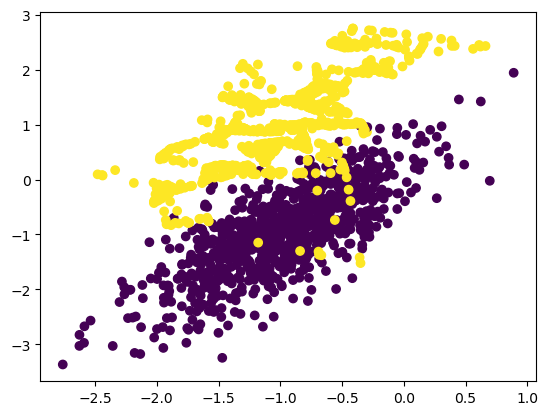

In [58]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])